In [88]:
import numpy as np
import matplotlib.pyplot as plt

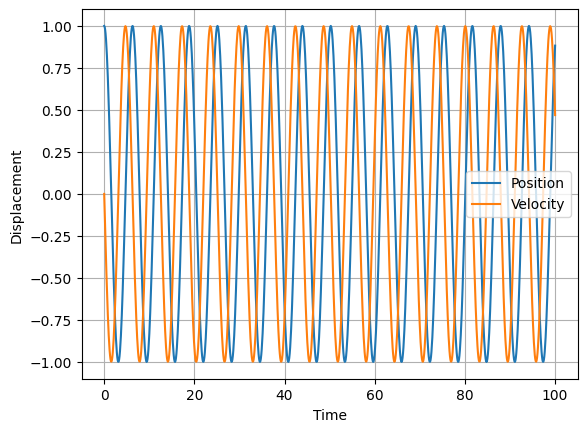

In [89]:
#Timestep
N = 1000 
t = np.linspace(0,100,N) 
dt = t[1]-t[0]

#Paramters
k = 1
m = 1
x0 = 1
v0 = 0
w = 1 #w = sqrt.(k/m) = 1

#Modified Leapfrog Integrator
def integrator(x0, v0, w, N, dt): 
     x = np.zeros(N)
     v = np.zeros(N)

     #Initial positions
     x[0] = x0 
     v[0] = v0
     
     #Equations of Motion
     for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * 0.5 * dt
        x[i+1] = x[i] + v[i+1] * dt
        v[i+1] = v[i+1] + x[i+1] * (-w**2) * 0.5 * dt

     return x,v
     
x,v = integrator(x0, v0, w, N, dt)
     
plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()


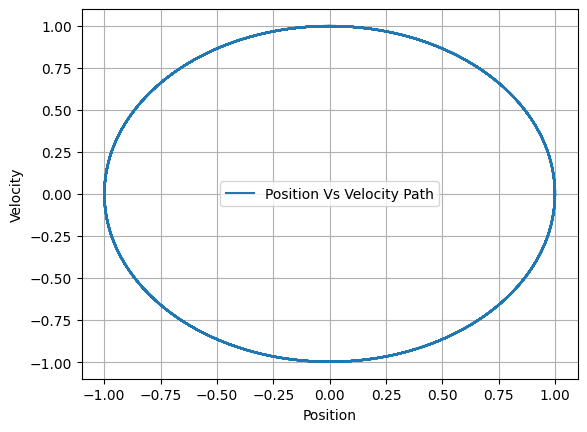

In [90]:
plt.figure()
plt.plot(x,v, label = "Position Vs Velocity Path")
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.legend()
plt.grid()
plt.show()

In [91]:
#Energy using modified version
KE = 0.5 * m * v**2
PE = 0.5 * k * x**2
E = PE + KE

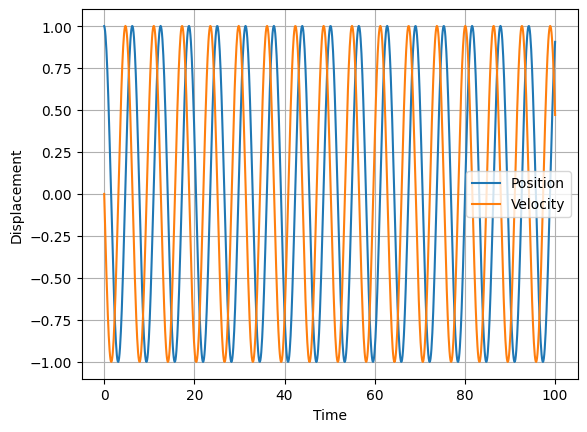

In [92]:
#Original Leapfrog Integrator
def integrator_original(x0, v0, w, N, dt): 
     x = np.zeros(N)
     v = np.zeros(N)

     #Initial positions
     x[0] = x0 
     v[0] = v0
     
     #Equaitons of Motion
     for i in range(N-1):
        v[i+1] = v[i] + x[i] * (-w**2) * dt
        x[i+1] = x[i] + v[i+1] * dt
        
     return x,v

x,v = integrator_original(x0, v0, w, N, dt)

plt.figure()
plt.plot(t, x, label = 'Position')
plt.plot(t, v, label = 'Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [93]:
E_original = 0.5 * m * v**2 + 0.5 * k * x**2

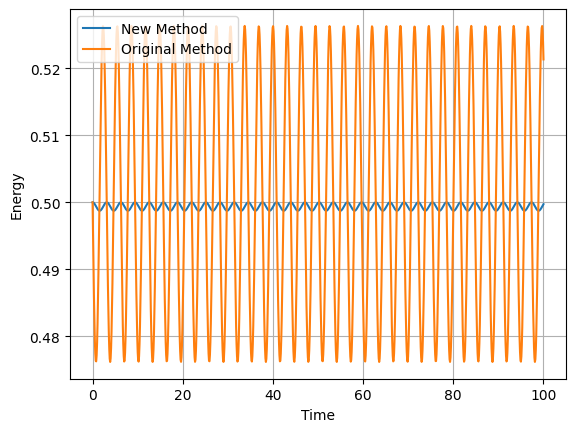

In [94]:
#Plot comparison of the two forms of Leapfrog Integration

plt.figure()
plt.plot(t, E, label = 'New Method')
plt.plot(t, E_original, label = 'Original Method')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend()
plt.grid()
plt.show()

# 2D Simple Harmonic Oscillator

In [95]:
import ipywidgets as wd
from mpl_toolkits.mplot3d import Axes3D

In [96]:
#Parameters

k_x = 1
k_y = 1
m = 1
x0 = 1
y0 = 1
v_x0 = 0
v_y0 = 0
w_x = 1 #w = sqrt.(k_x/m) = 1
w_y = 1 #w = sqrt.(k_y/m) = 1

In [104]:
#2D Leapfrog Integrator
def integrator_2d(x0, y0, v_x0, v_y0, w_x, w_y, N, dt): 
     x = np.zeros(N)
     y = np.zeros(N)
     v_x = np.zeros(N)
     v_y = np.zeros(N)

     #Initial positions
     x[0] = x0 
     y[0] = y0
     v_x[0] = v_x0
     v_y[0] = v_y0

     #Equations of Motion
     for i in range(N-1):
         v_x[i+1] = v_x[i] + x[i] * (-w_x**2) * 0.5 * dt
         v_y[i+1] = v_y[i] + y[i] * (-w_y**2) * 0.5 * dt
         x[i+1] = x[i] + v_x[i+1] * dt
         y[i+1] = y[i] + v_y[i+1] * dt
         v_x[i+1] = v_x[i+1] + x[i+1] * (-w_x**2) * 0.5 * dt
         v_y[i+1] = v_y[i+1] + y[i+1] * (-w_y**2) * 0.5 * dt

     return x,y,v_x, v_y
     
x,y,v_x,v_y = integrator_2d(x0, y0, v_x0, v_y0, w_x, w_y, N, dt)


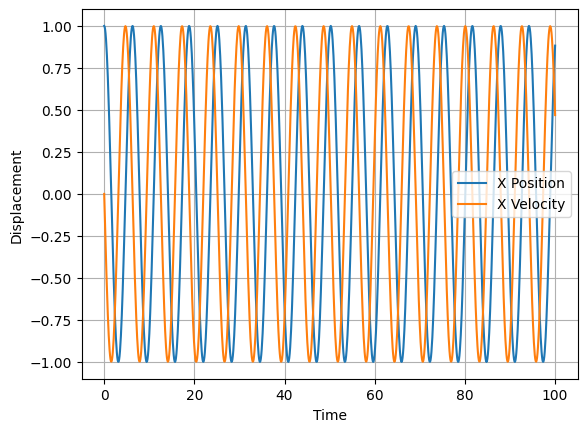

In [111]:
plt.figure()
plt.plot(t, x, label = 'X Position')
plt.plot(t, v_x, label = 'X Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

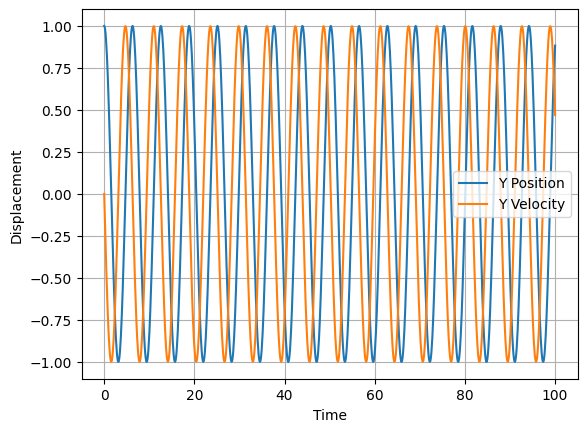

In [110]:
plt.figure()
plt.plot(t, y, label = 'Y Position')
plt.plot(t, v_y, label = 'Y Velocity')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid()
plt.show()

In [107]:
def my_cube_plot(x, y, v_x, v_y, t, my_azimuth, my_elevation):
    fig, ax = plt.subplots(
        subplot_kw={'projection': '3d'},
        figsize = (9, 9), 
        constrained_layout = True
        )
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Time')  

    ax.plot(x, v_x, t,
            color = 'Firebrick',
            marker = 'None',
            linestyle = '--',
            linewidth = 3)
    
    ax.plot(y, v_y, t,
              color = 'b',
              linestyle = '--',
              linewidth = 3)
    
    ax.view_init(azim = my_azimuth, elev = my_elevation)
    
    plt.show()

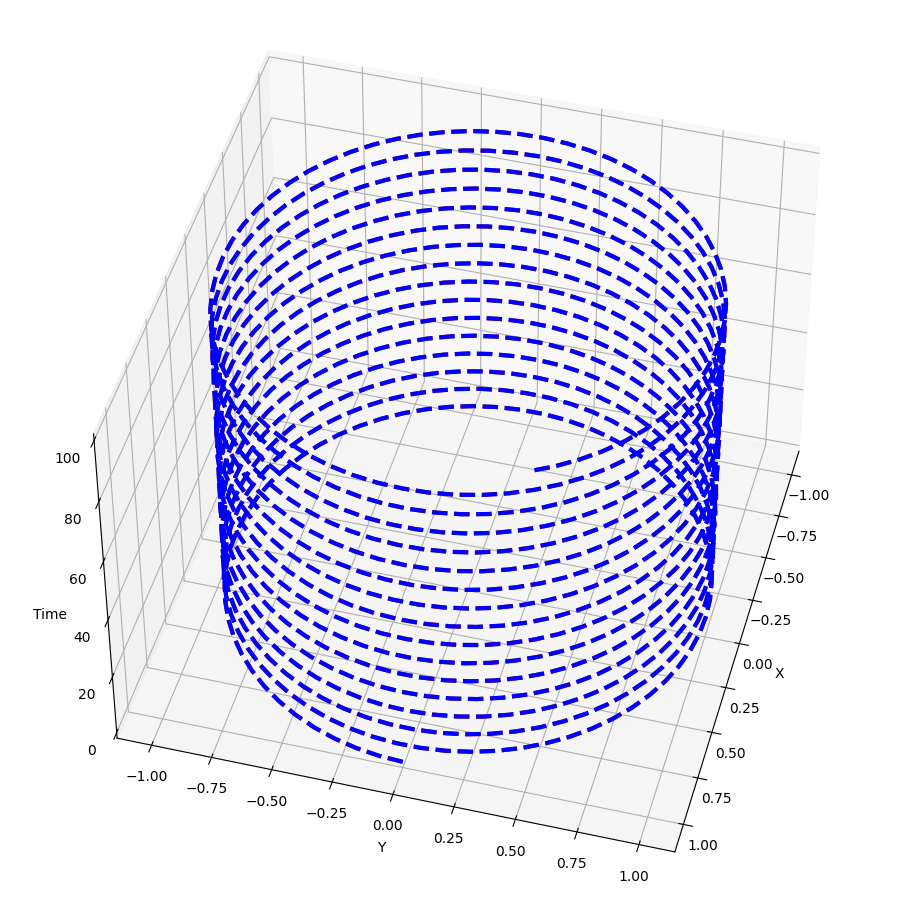

In [108]:
my_cube_plot(x, y, v_x, v_y, t,
    my_azimuth = 15,
    my_elevation = 45
)

In [109]:
azimuth_slider = wd.IntSlider(
    value=45,
    min=0,
    max=360,
    step=1,
    description='Azimuth:'
)

elevation_slider = wd.IntSlider(
    value=45,
    min=0,
    max=90,
    step=1,
    description='Elevation:'
)

In [115]:
wd.interact_manual(
    my_cube_plot,
    x = fixed(1),
    y = fixed(1),
    v_x = fixed(0),
    v_y = fixed(0),
    t = fixed(0),
    my_azimuth = azimuth_slider,
    my_elevation = elevation_slider
)

NameError: name 'fixed' is not defined

In [113]:
wd.interact_manual?

Signature:      wd.interact_manual(_InteractFactory__interact_f=None, **kwargs)
Type:           _InteractFactory
String form:    <ipywidgets.widgets.interaction._InteractFactory object at 0x1082867f0>
File:           ~/Documents/VSCode/python_env/lib/python3.9/site-packages/ipywidgets/widgets/interaction.py
Docstring:     
Factory for instances of :class:`interactive`.

This class is needed to support options like::

    >>> @interact.options(manual=True)
    ... def greeting(text="World"):
    ...     print("Hello {}".format(text))

Parameters
----------
cls : class
    The subclass of :class:`interactive` to construct.
options : dict
    A dict of options used to construct the interactive
    function. By default, this is returned by
    ``cls.default_options()``.
kwargs : dict
    A dict of **kwargs to use for widgets.
Call docstring:
Make the given function interactive by adding and displaying
the corresponding :class:`interactive` widget.

Expects the first argument to be a functi